In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [6]:
df=pd.read_csv('/content/employee_promotion.csv')

In [7]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [9]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [10]:
df.shape

(54808, 13)

In [11]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [12]:
df.dropna(axis=0,inplace=True)

In [13]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

In [14]:
df.reset_index(drop=True, inplace= True)

In [15]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46375,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,49.0,0
46376,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
46377,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
46378,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0


In [16]:
df.drop(columns=['employee_id'], inplace=True)

In [17]:
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
46375,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,49.0,0
46376,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
46377,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
46378,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0


In [18]:
num_feautures=[i for i in df.columns if df.dtypes[i]!='object']
num_feautures

['no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'awards_won',
 'avg_training_score',
 'is_promoted']

In [19]:
cat_feautures=[i for i in df.columns if df.dtypes[i]=='object']
cat_feautures

['department', 'region', 'education', 'gender', 'recruitment_channel']

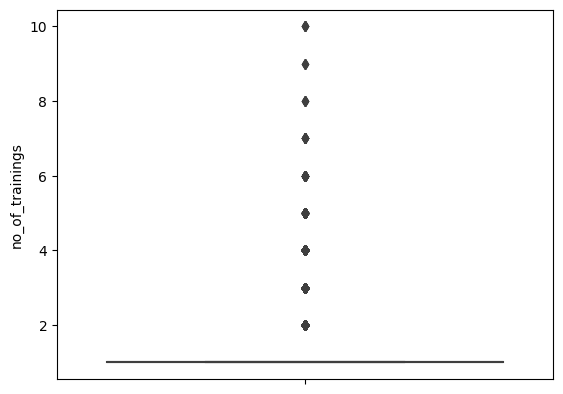

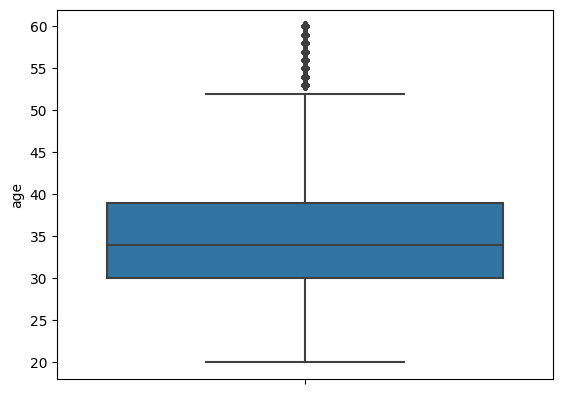

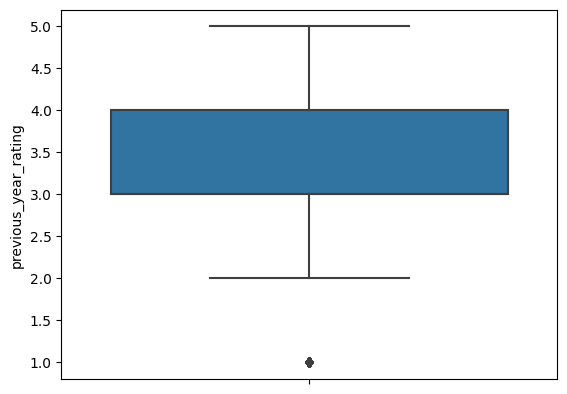

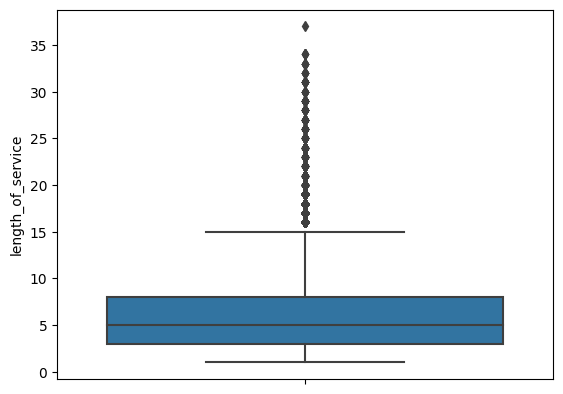

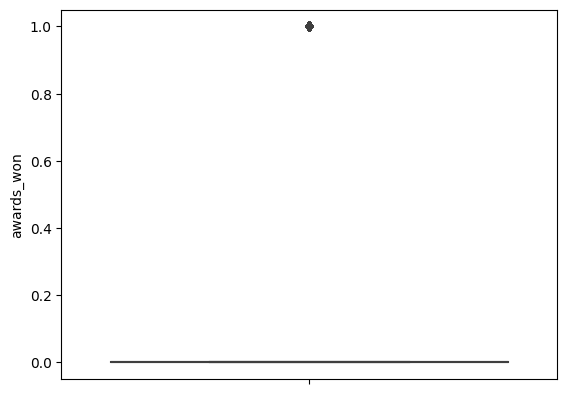

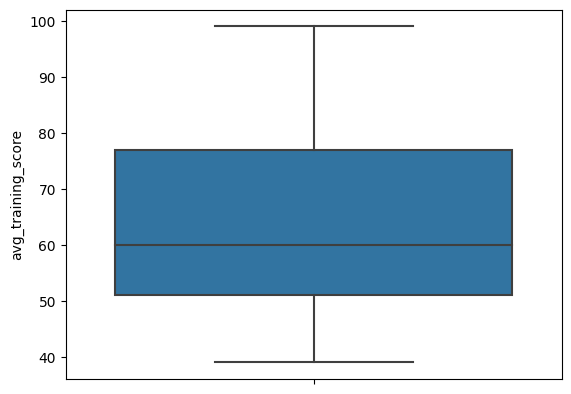

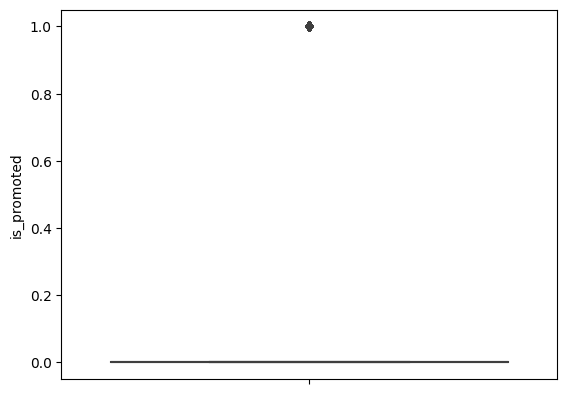

In [20]:
for i in num_feautures:
  plt.figsize=(10,5)
  sns.boxplot(y=df[i])
  plt.show()

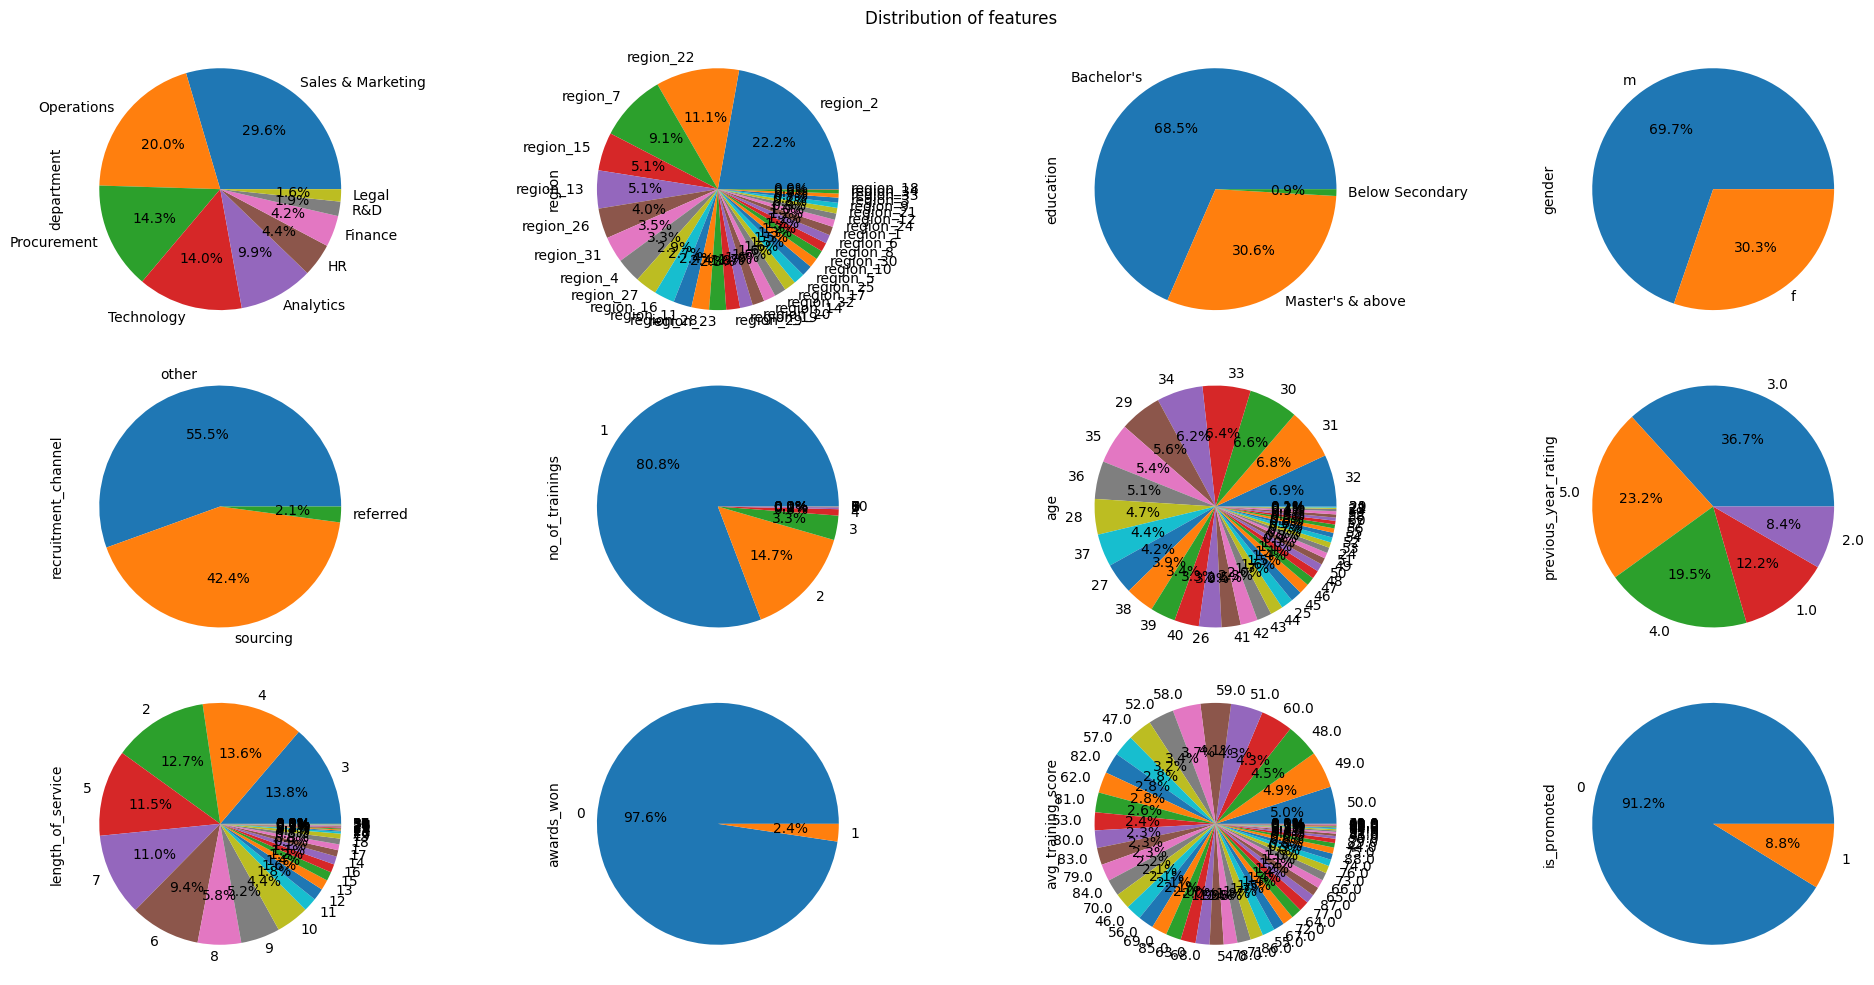

In [21]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))

for i, feature in enumerate(df.columns):
    row = int(i/4)
    col = i%4
    pd.value_counts(df.iloc[:, i]).plot.pie(autopct="%.1f%%", ax=axs[row][col])

plt.suptitle('Distribution of features')
plt.tight_layout()



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating you

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

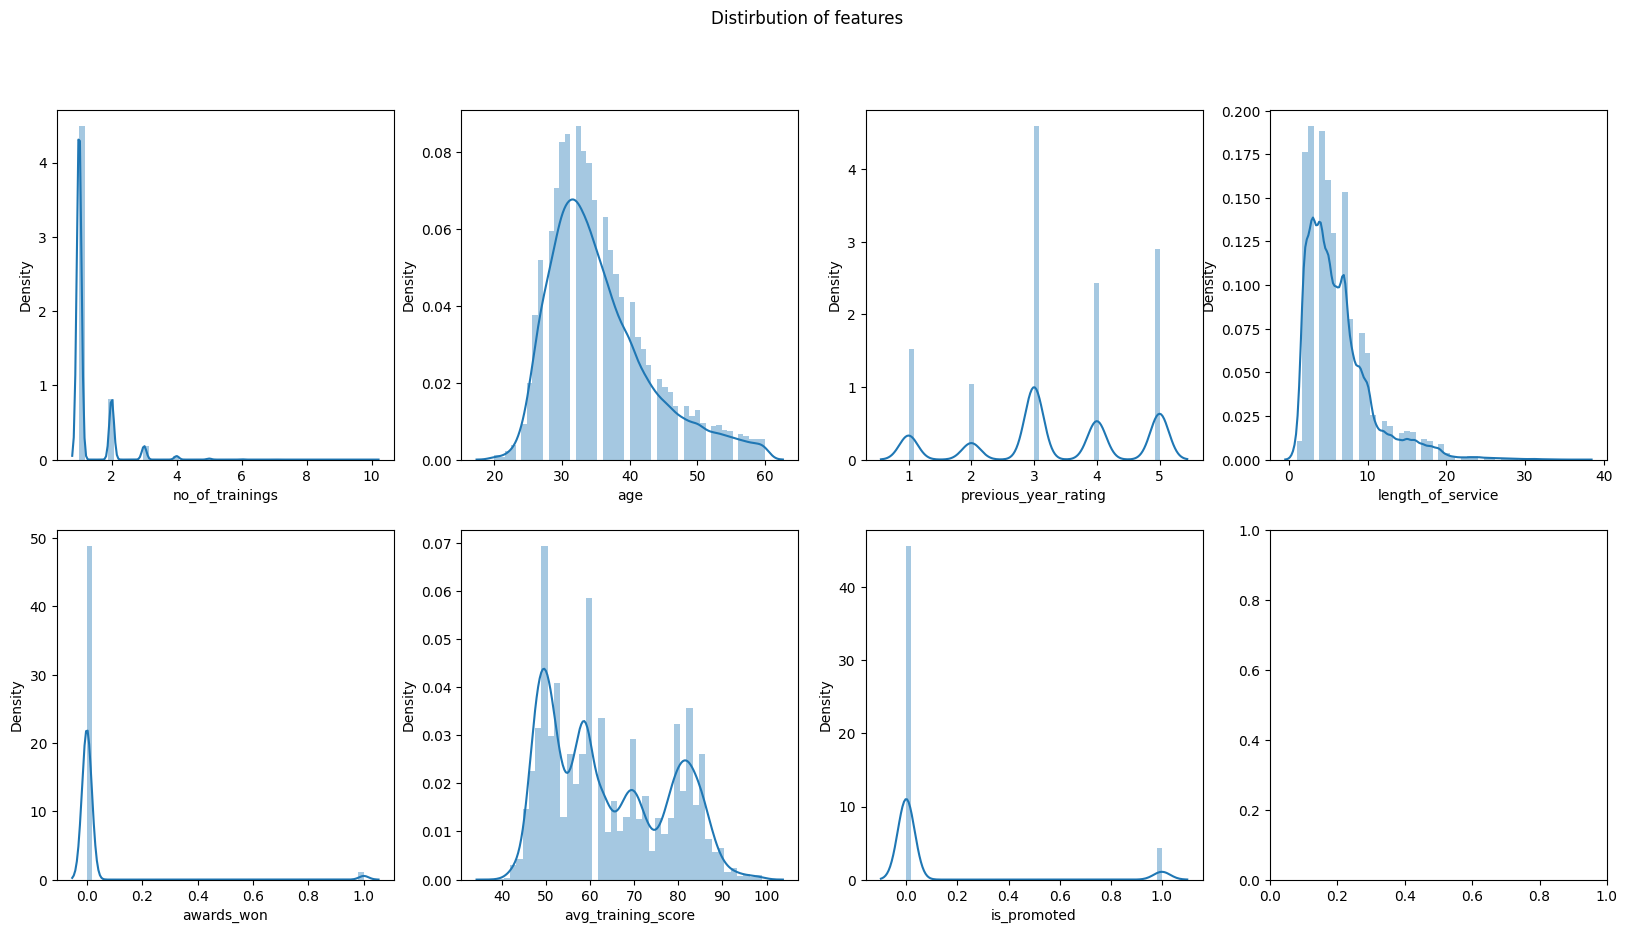

In [22]:
columns = [ 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted']
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, feature in enumerate(df[columns]):
    row = int(i/4)
    col = i%4
    sns.distplot(df[columns].iloc[:, i], ax=axs[row][col])

plt.suptitle('Distirbution of features')
plt.tight_layout

In [23]:
import scipy.stats as stat
import pylab

In [24]:
def plot_curve(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

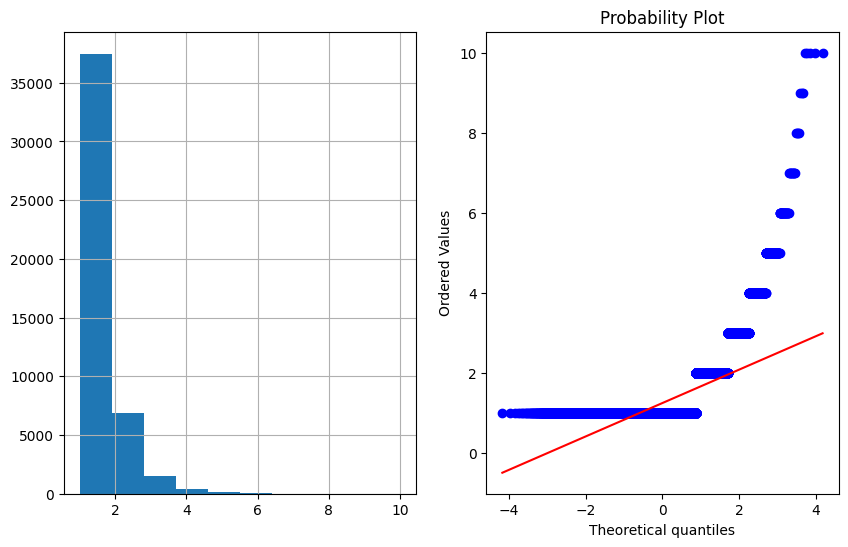

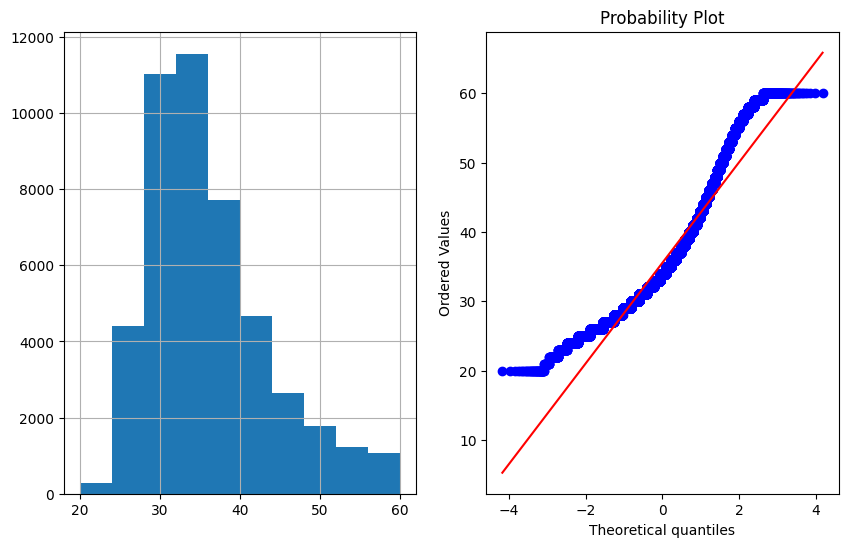

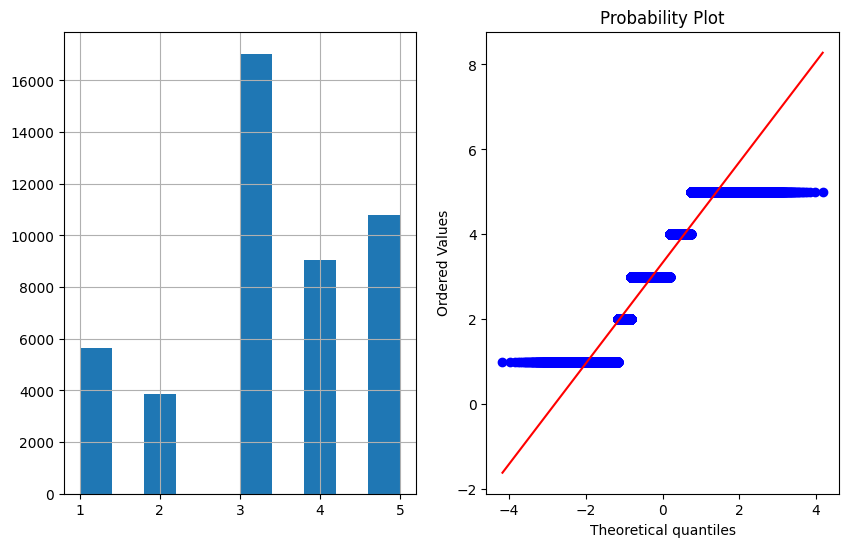

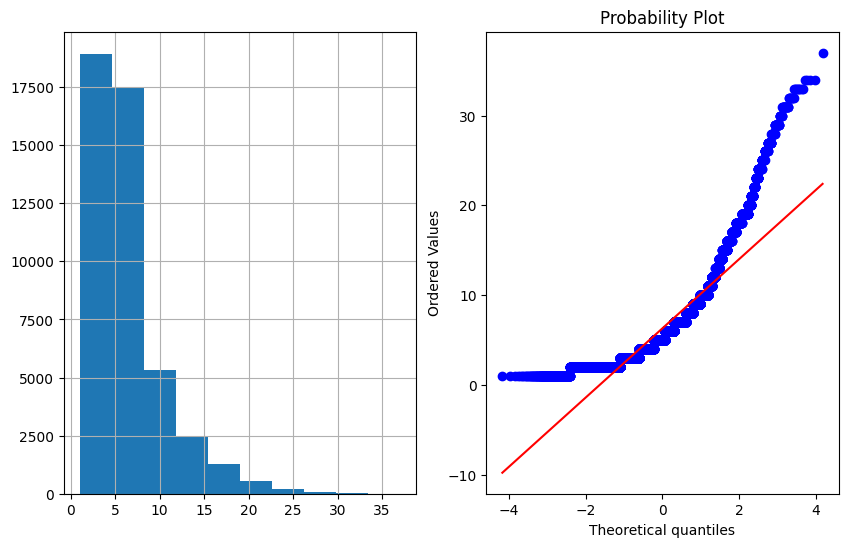

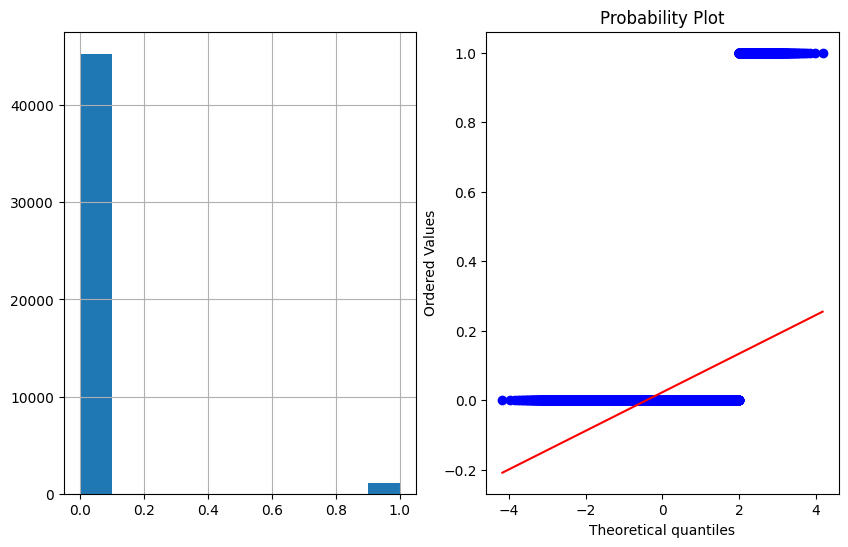

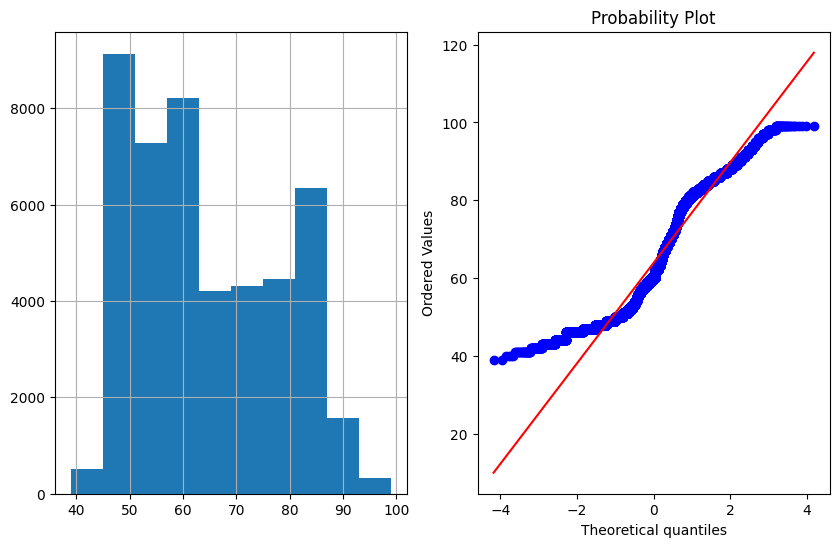

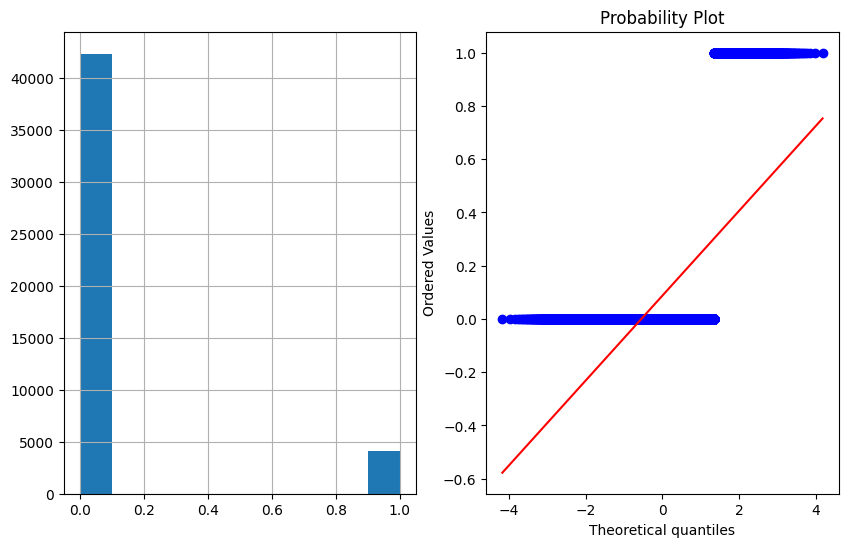

In [25]:
for feature in columns:
    plot_curve(df,feature)

In [26]:
age_log = np.log1p(df['age'])
service_log = np.log1p(df['length_of_service'])
score_log = np.log1p(df['avg_training_score'])

df.insert(6, 'age_log', age_log)
df.insert(9, 'length_of_service_log', service_log)
df.insert(12, 'avg_training_score_log', score_log)

df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age_log,age,previous_year_rating,length_of_service_log,length_of_service,awards_won,avg_training_score_log,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,3.583519,35,5.0,2.197225,8,0,3.912023,49.0,0
1,Operations,region_22,Bachelor's,m,other,1,3.433987,30,5.0,1.609438,4,0,4.110874,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,3.555348,34,3.0,2.079442,7,0,3.931826,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,3.688879,39,1.0,2.397895,10,0,3.931826,50.0,0
4,Technology,region_26,Bachelor's,m,other,1,3.828641,45,3.0,1.098612,2,0,4.304065,73.0,0




`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating you

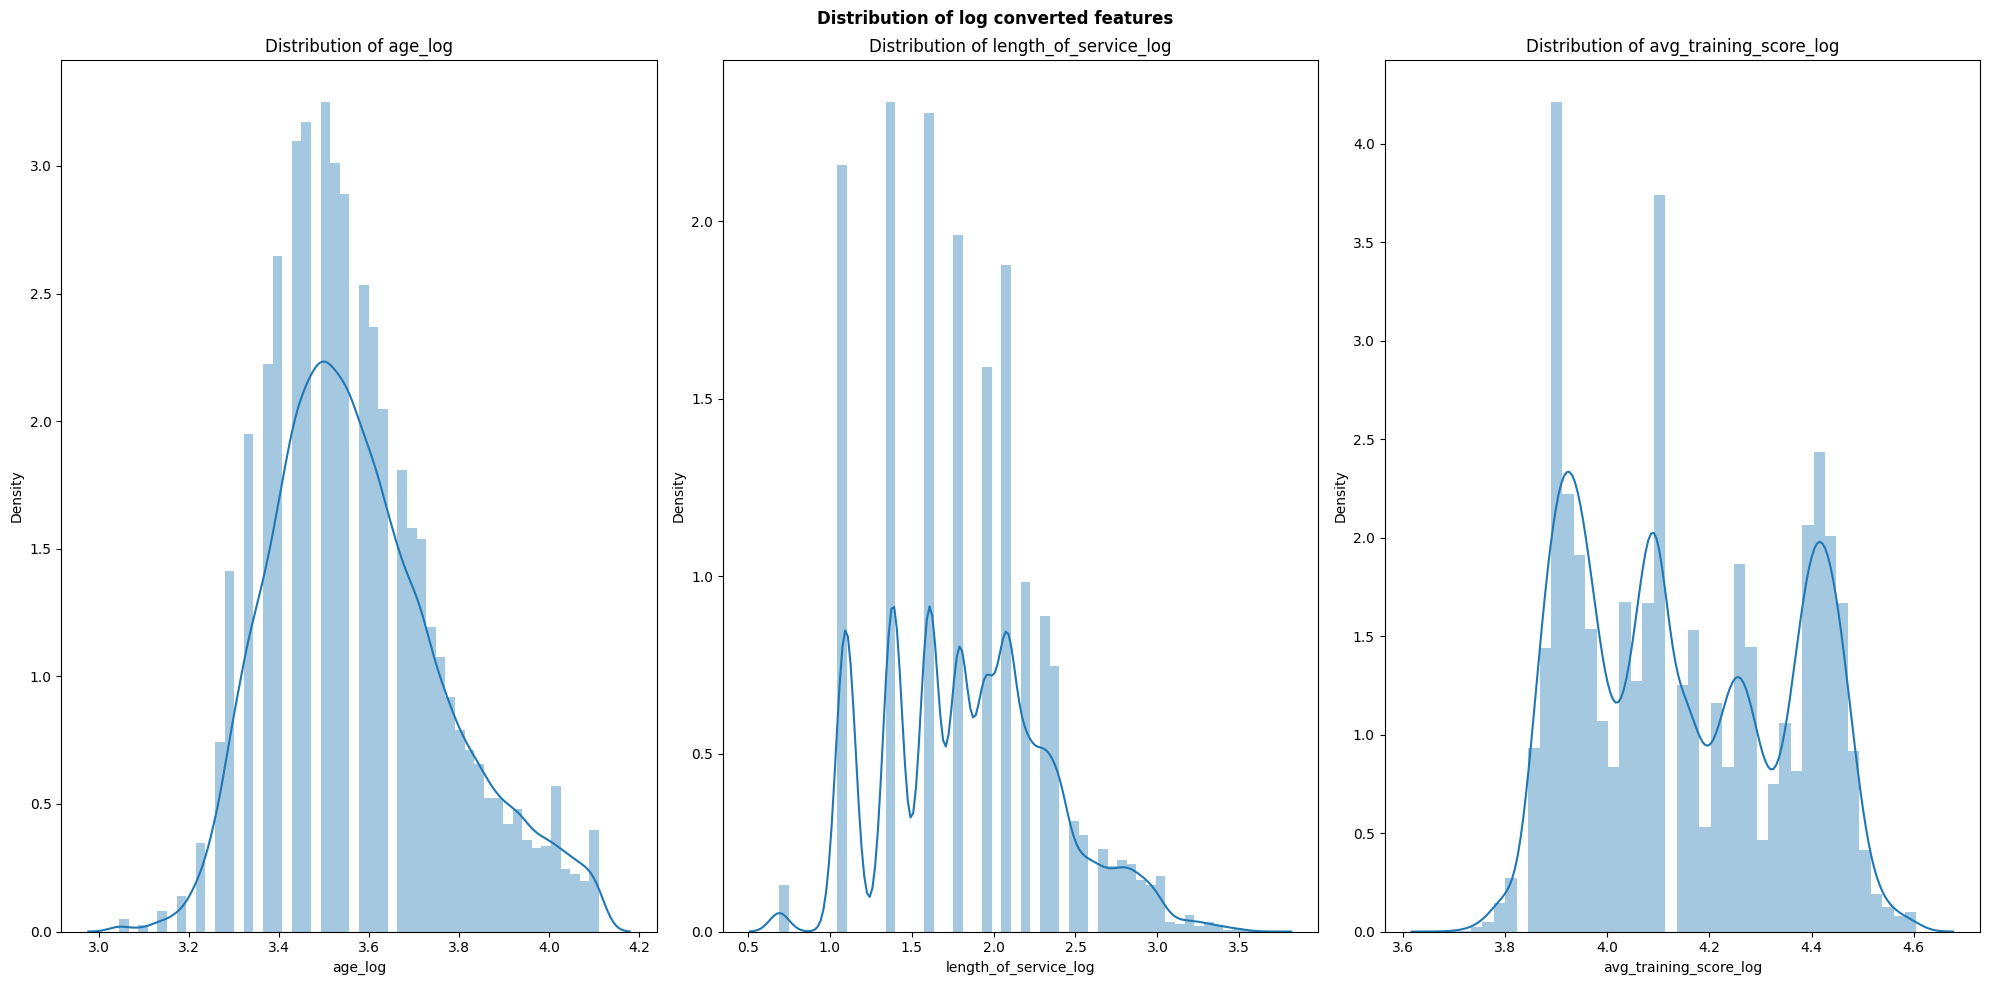

In [27]:
log_columns = ['age_log', 'length_of_service_log', 'avg_training_score_log']

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

sns.distplot(df['age_log'], ax=ax1)
ax1.set_title('Distribution of age_log')
sns.distplot(df['length_of_service_log'], ax=ax2)
ax2.set_title('Distribution of length_of_service_log')
sns.distplot(df['avg_training_score_log'], ax=ax3)
ax3.set_title('Distribution of avg_training_score_log')

plt.suptitle('Distribution of log converted features', fontweight='bold')
plt.tight_layout()
plt.show()

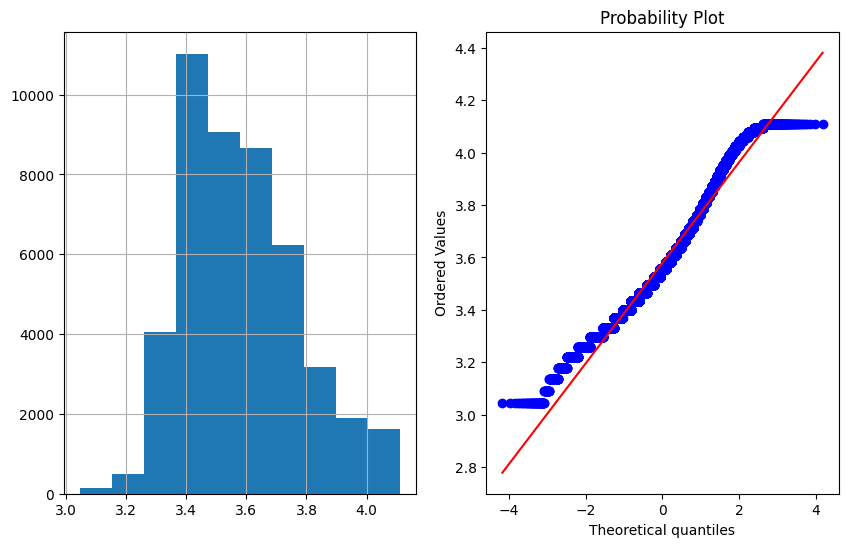

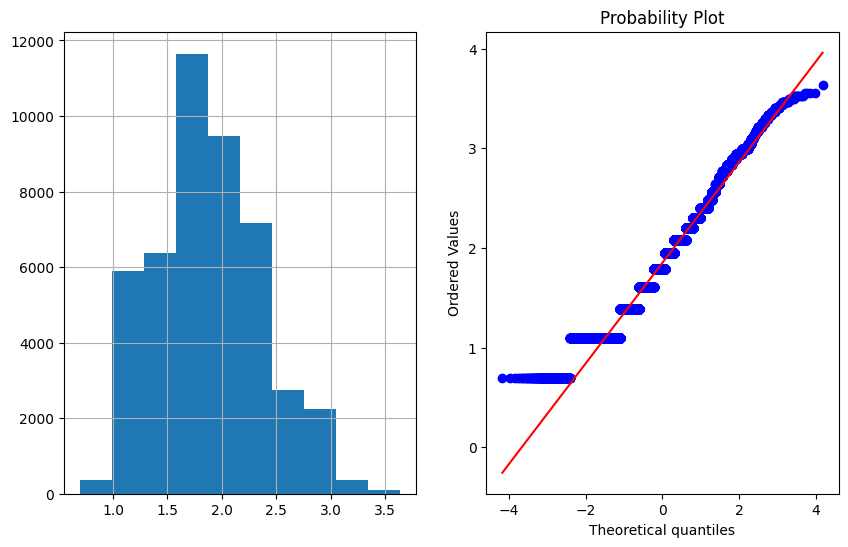

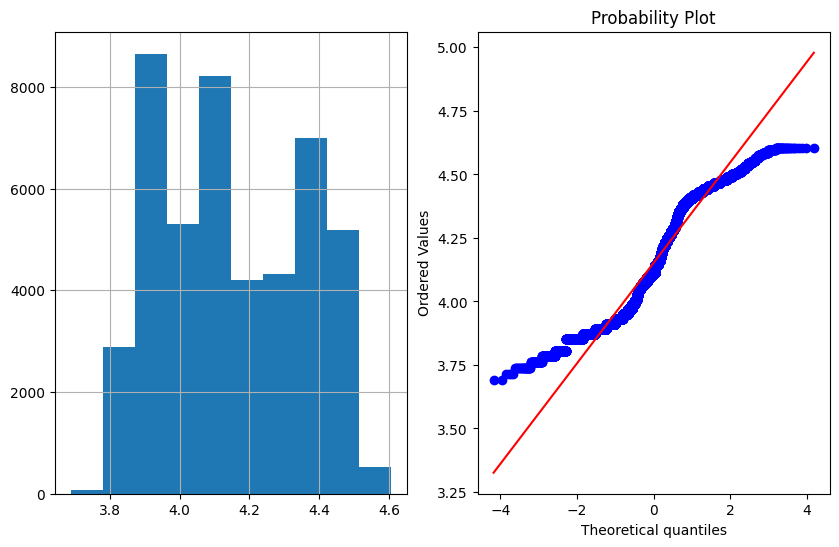

In [28]:
for feature in log_columns:
    plot_curve(df,feature)

<Axes: title={'center': 'Correlation between different fealtures'}>

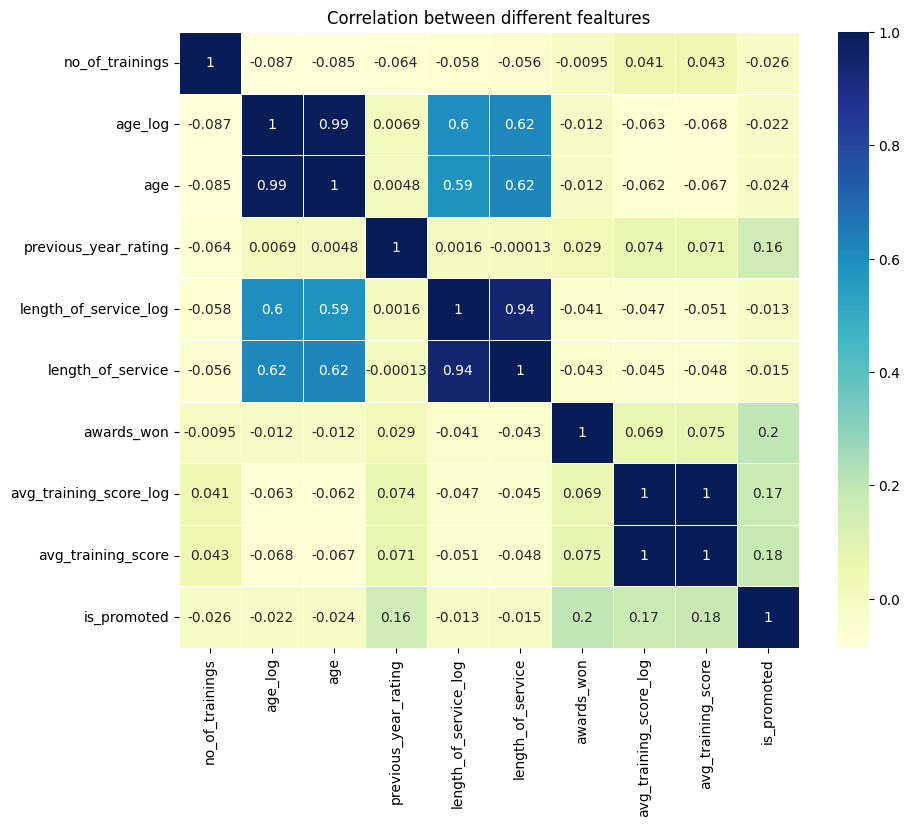

In [29]:
plt.figure(figsize=(10,8))
plt.title('Correlation between different fealtures')
sns.heatmap(df.corr(), annot=True, linewidths=.5 ,  cmap='YlGnBu')

In [30]:
df_encoded = pd.get_dummies(df)
df_encoded.head()

,no_of_trainings,age_log,age,previous_year_rating,length_of_service_log,length_of_service,awards_won,avg_training_score_log,avg_training_score,is_promoted,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,3.583519,35,5.0,2.197225,8,0,3.912023,49.0,0,...,0,0,0,0,1,1,0,0,0,1
1,1,3.433987,30,5.0,1.609438,4,0,4.110874,60.0,0,...,0,0,1,0,0,0,1,1,0,0
2,1,3.555348,34,3.0,2.079442,7,0,3.931826,50.0,0,...,0,0,1,0,0,0,1,0,0,1
3,2,3.688879,39,1.0,2.397895,10,0,3.931826,50.0,0,...,0,0,1,0,0,0,1,1,0,0
4,1,3.828641,45,3.0,1.098612,2,0,4.304065,73.0,0,...,0,0,1,0,0,0,1,1,0,0


In [31]:
df_encoded.shape

(46380, 61)

In [32]:
from sklearn.preprocessing import StandardScaler
features = np.array(df_encoded.columns).reshape(-1, 1)

for feature in features:
    scaler = StandardScaler()
    scaler.fit(df_encoded[feature])
    df_encoded[feature] = scaler.transform(df_encoded[feature])

df_encoded.head()

,no_of_trainings,age_log,age,previous_year_rating,length_of_service_log,length_of_service,awards_won,avg_training_score_log,avg_training_score,is_promoted,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,-0.418611,0.019377,-0.076052,1.324653,0.673784,0.402667,-0.155136,-1.177045,-1.111888,-0.310195,...,-0.109043,-0.083089,-1.474410,-0.09548,1.505848,1.518245,-1.518245,-1.117074,-0.146768,1.166064
1,-0.418611,-0.749600,-0.740379,1.324653,-0.474482,-0.549239,-0.155136,-0.202848,-0.292548,-0.310195,...,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,0.895195,-0.146768,-0.857586
2,-0.418611,-0.125493,-0.208918,-0.263965,0.443690,0.164690,-0.155136,-1.080029,-1.037403,-0.310195,...,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,-1.117074,-0.146768,1.166064
3,1.226184,0.561202,0.455409,-1.852582,1.065803,0.878619,-0.155136,-1.080029,-1.037403,-0.310195,...,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,0.895195,-0.146768,-0.857586
4,-0.418611,1.279937,1.252601,-0.263965,-1.472401,-1.025192,-0.155136,0.743621,0.675764,-0.310195,...,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,0.895195,-0.146768,-0.857586


In [33]:
x = df_encoded.drop(columns=['is_promoted'], inplace=False)
y = df_encoded['is_promoted'].astype(int)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

In [35]:

print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (37104, 60)
Shape of X_test:  (9276, 60)
Shape of y_train:  (37104,)
Shape of y_test:  (9276,)


In [37]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 24.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [1]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
     def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average="macro")
    recall = recall_score(y_test, pred, average="macro")
    f1 = f1_score(y_test, pred, average="macro")
    roc_auc = roc_auc_score(y_test, pred_proba, average="macro")
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:

dt_clf = DecisionTreeClassifier()

In [40]:
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)[:, 1]

In [41]:
get_clf_eval(y_test, dt_pred, dt_pred_proba)

Confusion Matrix
[[7885  588]
 [ 429  374]]
Accuracy: 0.8904, Precision: 0.6686, Recall 0.6982, F1: 0.6816, AUC:0.6980


In [43]:
lr_clf = LogisticRegression()

In [44]:
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

In [45]:
get_clf_eval(y_test, lr_pred, lr_pred_proba)

Confusion Matrix
[[8458   15]
 [ 515  288]]
Accuracy: 0.9429, Precision: 0.9466, Recall 0.6784, F1: 0.7452, AUC:0.8070


In [46]:
rf_clf = RandomForestClassifier()

In [47]:
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)[:, 1]


In [48]:
get_clf_eval(y_test, rf_pred, rf_pred_proba)

Confusion Matrix
[[8447   26]
 [ 510  293]]
Accuracy: 0.9422, Precision: 0.9308, Recall 0.6809, F1: 0.7458, AUC:0.7989


In [49]:
!pip install evalml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.3/618.3 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... do

In [1]:
!pip install scikit-learn==0.24

  Using cached scikit-learn-0.24.0.tar.gz (7.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for scikit-learn (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
Failed to build scikit-learn
ERROR: Could not build wheels for scikit-learn, which is required to install pyproject.toml-based projects


In [2]:
import evalml

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [3]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

In [36]:
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(x, y, problem_type='binary')

In [37]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()

{1: {'Random Forest Classifier w/ Label Encoder + Imputer + Undersampler': 9.755111455917358,
  'Total time of batch': 9.998051881790161},
 2: {'Random Forest Classifier w/ Label Encoder + Imputer + Undersampler + RF Classifier Select From Model': 9.696831941604614,
  'Total time of batch': 9.842402219772339},
 3: {'LightGBM Classifier w/ Label Encoder + Imputer + Undersampler + Select Columns Transformer': 4.287469863891602,
  'Extra Trees Classifier w/ Label Encoder + Imputer + Undersampler + Select Columns Transformer': 6.714422941207886,
  'Elastic Net Classifier w/ Label Encoder + Imputer + Undersampler + Standard Scaler + Select Columns Transformer': 9.621690034866333,
  'XGBoost Classifier w/ Label Encoder + Imputer + Undersampler + Select Columns Transformer': 9.968685150146484,
  'Logistic Regression Classifier w/ Label Encoder + Imputer + Undersampler + Standard Scaler + Select Columns Transformer': 9.401452779769897,
  'Total time of batch': 40.6762478351593}}

In [38]:
automl.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,3,LightGBM Classifier w/ Label Encoder + Imputer...,3,0.241047,0.241047,0.000376,92.381397,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,6,XGBoost Classifier w/ Label Encoder + Imputer ...,6,0.242098,0.242098,0.000154,92.348155,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,7,Logistic Regression Classifier w/ Label Encode...,7,0.269065,0.269065,0.001430,91.495831,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,5,Elastic Net Classifier w/ Label Encoder + Impu...,5,0.269071,0.269071,0.001417,91.495645,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,2,Random Forest Classifier w/ Label Encoder + Im...,2,0.284748,0.284748,0.001138,91.000146,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,1,Random Forest Classifier w/ Label Encoder + Im...,1,0.292398,0.292398,0.000482,90.758356,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,4,Extra Trees Classifier w/ Label Encoder + Impu...,4,0.294686,0.294686,0.001131,90.686047,False,"{'Label Encoder': {'positive_label': None}, 'I..."
7,0,Mode Baseline Binary Classification Pipeline,0,3.163922,3.163922,0.001683,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [39]:
automl.best_pipeline
best_pipeline=automl.best_pipeline

In [40]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


**********************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
**********************************************************************************************


* LightGBM Classifier w/ Label Encoder + Imputer + Undersampler + Select Columns Transformer *


INFO:evalml.pipelines.pipeline_base.describe:* LightGBM Classifier w/ Label Encoder + Imputer + Undersampler + Select Columns Transformer *


**********************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:**********************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: binary


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: binary


Model Family: LightGBM


INFO:evalml.pipelines.pipeline_base.describe:Model Family: LightGBM


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Imputer


INFO:evalml.pipelines.component_graph.describe:2. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


3. Undersampler


INFO:evalml.pipelines.component_graph.describe:3. Undersampler


	 * sampling_ratio : 0.25


INFO:evalml.pipelines.components.component_base.describe:	 * sampling_ratio : 0.25


	 * min_samples : 100


INFO:evalml.pipelines.components.component_base.describe:	 * min_samples : 100


	 * min_percentage : 0.1


INFO:evalml.pipelines.components.component_base.describe:	 * min_percentage : 0.1


	 * sampling_ratio_dict : None


INFO:evalml.pipelines.components.component_base.describe:	 * sampling_ratio_dict : None


4. Select Columns Transformer


INFO:evalml.pipelines.component_graph.describe:4. Select Columns Transformer


	 * columns : ['no_of_trainings', 'age_log', 'age', 'previous_year_rating', 'length_of_service_log', 'length_of_service', 'awards_won', 'avg_training_score_log', 'avg_training_score', 'department_Analytics', 'department_Finance', 'department_Operations', 'department_Procurement', 'department_Sales & Marketing', 'department_Technology', 'region_region_13', 'region_region_15', 'region_region_2', 'region_region_22', 'region_region_26', 'region_region_27', 'region_region_28', 'region_region_4', 'region_region_7', "education_Bachelor's", "education_Master's & above", 'gender_f', 'gender_m', 'recruitment_channel_other', 'recruitment_channel_sourcing']


INFO:evalml.pipelines.components.component_base.describe:	 * columns : ['no_of_trainings', 'age_log', 'age', 'previous_year_rating', 'length_of_service_log', 'length_of_service', 'awards_won', 'avg_training_score_log', 'avg_training_score', 'department_Analytics', 'department_Finance', 'department_Operations', 'department_Procurement', 'department_Sales & Marketing', 'department_Technology', 'region_region_13', 'region_region_15', 'region_region_2', 'region_region_22', 'region_region_26', 'region_region_27', 'region_region_28', 'region_region_4', 'region_region_7', "education_Bachelor's", "education_Master's & above", 'gender_f', 'gender_m', 'recruitment_channel_other', 'recruitment_channel_sourcing']


5. LightGBM Classifier


INFO:evalml.pipelines.component_graph.describe:5. LightGBM Classifier


	 * boosting_type : gbdt


INFO:evalml.pipelines.components.component_base.describe:	 * boosting_type : gbdt


	 * learning_rate : 0.1


INFO:evalml.pipelines.components.component_base.describe:	 * learning_rate : 0.1


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * max_depth : 0


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 0


	 * num_leaves : 31


INFO:evalml.pipelines.components.component_base.describe:	 * num_leaves : 31


	 * min_child_samples : 20


INFO:evalml.pipelines.components.component_base.describe:	 * min_child_samples : 20


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


	 * bagging_freq : 0


INFO:evalml.pipelines.components.component_base.describe:	 * bagging_freq : 0


	 * bagging_fraction : 0.9


INFO:evalml.pipelines.components.component_base.describe:	 * bagging_fraction : 0.9


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for binary problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for binary problems.


Total training time (including CV): 4.3 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 4.3 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.241       0.511 0.629 0.814      0.739 0.516                     0.691            0.935     24,736       12,368
1                      0.241       0.532 0.602 0.801      0.883 0.499                     0.672            0.939     24,736       12,368
2                      0.241       0.481 0.627 0.813      0.663 0.499                     0.690            0.929     24,736       12,368
mean                   0.241       0.508 0.619 0.810      0.762 0.505                     0.685            0.934          -            -
std                    0.000       0.026 0.015 0.008      0.112 0.010                     0.011            0.005          -            -
coef of var            0.002       0.050 0.024 0.009      0.147 0.019                     0.016            0.005          -            -


INFO:evalml.automl.automl_search.describe_pipeline:             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.241       0.511 0.629 0.814      0.739 0.516                     0.691            0.935     24,736       12,368
1                      0.241       0.532 0.602 0.801      0.883 0.499                     0.672            0.939     24,736       12,368
2                      0.241       0.481 0.627 0.813      0.663 0.499                     0.690            0.929     24,736       12,368
mean                   0.241       0.508 0.619 0.810      0.762 0.505                     0.685            0.934          -            -
std                    0.000       0.026 0.015 0.008      0.112 0.010                     0.011            0.005          -            -
coef of var            0.002       0.050 0.024 0.009      0.147 0.019                     0.016            0.005          -    

In [41]:
evalml.objectives.get_all_objective_names()

['expvariance',
 'maxerror',
 'medianae',
 'mse',
 'mae',
 'r2',
 'mean squared log error',
 'root mean squared log error',
 'root mean squared error',
 'symmetric mean absolute percentage error',
 'mean absolute percentage error',
 'mcc multiclass',
 'log loss multiclass',
 'auc weighted',
 'auc macro',
 'auc micro',
 'recall weighted',
 'recall macro',
 'recall micro',
 'precision weighted',
 'precision macro',
 'precision micro',
 'f1 weighted',
 'f1 macro',
 'f1 micro',
 'balanced accuracy multiclass',
 'accuracy multiclass',
 'mcc binary',
 'log loss binary',
 'gini',
 'auc',
 'recall',
 'precision',
 'f1',
 'balanced accuracy binary',
 'accuracy binary',
 'sensitivity at low alert rates',
 'lead scoring',
 'fraud cost',
 'cost benefit matrix']

In [42]:
best_pipeline.score(X_test, y_test,objectives=["accuracy binary"])

OrderedDict([('Accuracy Binary', 0.9385510996119016)])

In [43]:
best_pipeline.save("model.pkl")
final_model=automl.load('model.pkl')

In [44]:
pred=final_model.predict(X_test)

In [45]:
pred

40585    0
15718    0
42264    0
46363    0
37567    0
        ..
18784    0
7713     0
11045    0
40741    0
43894    0
Name: is_promoted, Length: 9276, dtype: int64

In [46]:
y_test

40585    0
15718    0
42264    0
46363    0
37567    0
        ..
18784    0
7713     0
11045    0
40741    0
43894    0
Name: is_promoted, Length: 9276, dtype: int64